In [ ]:
import re
import sys
import operator
from os import listdir
from os.path import join,isdir,isfile
from unicodedata import normalize

#Variables Globales
dirpath = " "
minTerm = 0
maxTerm = 0
vacias_path = " "
token = 0

vocabulario = []
vocabulario_DF = {}
vocabulario_CF = {}
lista_vacias=[]



#carga las palabras vacias de archivo vacias_path
def cargar_palabras_vacias(vaciaspath) :
	lista = []
	separador = '\n'
	if not isdir(vaciaspath) and isfile(vaciaspath) :
		with open(vaciaspath, "r", encoding="utf-8") as f:
			for line in f.readlines():
				line= line.split(separador)[0]
				line=line.replace('á','a')
				line=line.replace('é','e')
				line=line.replace('í','i')
				line=line.replace('ó','o')
				line=line.replace('ú','u')
				line=line.replace('ü','u') 
				lista.append(line)
		f.close()
	return lista

#quita las palabras vacias de la lista de tokens
def sacar_palabras_vacias(lista_tokens):
	lista = []
	for palabra in lista_tokens :
		if palabra not in lista_vacias:
			lista.append(palabra)
	return lista


#normalizacion de tokens
def tokenizar(line):
	token=["»","<",">",".","·",",",":",";","!","¡","¿","?","#","$","%","&","/","(",")","[","]","{","}","+","-","*","_","|","°","=","'",'"']
	lista = []
	#print("linea del archivo:"+line)
	line = line.lower()
	for t in token:
		line=line.replace(t,' ')	
	line = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", line), 0, re.I)
	line = normalize( 'NFC', line)
	line = line.split()
	for word in line :
		if ( ( minTerm  == 0 ) and (  maxTerm == 0 ) ) :
			lista.append(word)
		else:
			if (len(word)>=minTerm)and(len(word)<=maxTerm) :
				lista.append(word)
	return lista



def generar_listas(dir_path) :
	#recorro los documentos 
	#por cada linea 
	# tokenizar
	#limpios palabras vacias y repetidos
	#queda armada una lista de palabras por documento.
	lista_tokens=[]
	with open(dir_path, "r", encoding="utf-8") as f:
		for line in f.readlines():
			lista_tokens= lista_tokens + tokenizar(line) 
			if (isfile(vacias_path)) :
				lista_tokens = sacar_palabras_vacias(lista_tokens) 
		cargar_vocabulario(lista_tokens)
		lista_tokens=[]
	f.close() 

def cargar_vocabulario(document) :
	#para cada lista de documento hacer 
	#SINO existe la palabra entonces la agrego al vocabulario con DF=1 Y CF=1
	#SI existe la palabra entonces CF++ y DF++  
	for word in document :
		if word in vocabulario_CF :
			vocabulario_CF[word] = vocabulario_CF[word]+1
			
		else:
			vocabulario_CF[word]= 1
	vistas = []
	for word in document :
		if word not in vistas:
				vistas.append(word)
	for word in vistas :
		if not (word in vocabulario_DF ): 
			vocabulario_DF[word] = 1
		else:
			vocabulario_DF[word]= vocabulario_DF[word] + 1
 
def main(dir,min,max,vacias):
	#inicio del programa
	#Cargo variables globales con los argv
	dir_path = dir
	minTerm = int(min)
	maxTerm = int(max)
	vacias_path = vacias
	lista_vacias = cargar_palabras_vacias(vacias_path)
	print(vocabulario_DF)
	generar_listas(dir)
	return(vocabulario_CF)    


In [ ]:
v=main("C:/Users/user/Documents/Desarrollo/RI/TPS/Scripts/asd/pg2000.txt",0,0," ")
print(v)


Cantidad de términos totales: 23220
Inicio índice: 1161
Fin índice: 22059
Cantidad de términos sin los extremos: 20898


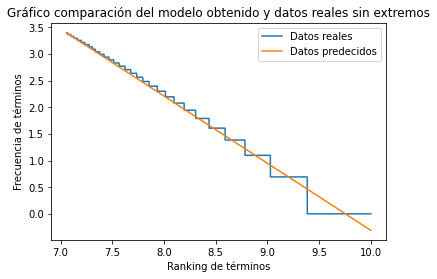

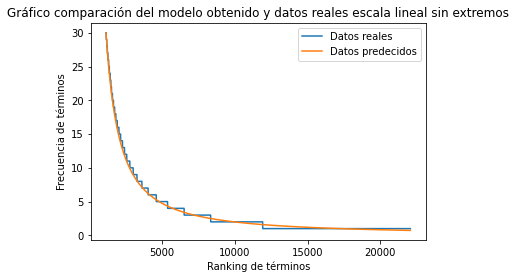

In [30]:
import numpy as np
from matplotlib import pyplot as plt
# Sort terms
x = [] # ranking terms
y = [] # frecuency terms
sorted_terms= {}
sorted_terms = sorted(v, key=v.get, reverse=True)
i = 1
for token in sorted_terms:
    cf = v[token]
    y.append(cf)
    x.append(i)
    i += 1
# Log scale
log_x = np.log(x)
log_y = np.log(y)
# Compute model(curva ajustada) polyfit numpy
# ajuste = np.polyfit(x log, y log, grado del polinomio = 1) retorna los coeficientes del polinomio [coef grado 1 alfa, coef grado 0 c]
ajuste = np.polyfit(log_x, log_y, 1)
rect = np.poly1d(ajuste) #internamente representa un polinomio 
# Ajuste sin valores extremos:
print('Cantidad de términos totales: '+str(len(log_y)))
i_i = int(len(log_x)*0.05)
i_f = int(len(log_x) - len(log_x)*0.05)
print('Inicio índice: '+str(i_i))
print('Fin índice: '+str(i_f))
_log_x = log_x[i_i:i_f]
_log_y = log_y[i_i:i_f]
print('Cantidad de términos sin los extremos: '+str(len(_log_x)))
_ajuste = np.polyfit(_log_x, _log_y, 1) # retorna los coeficientes del polinomio [coef grado 1 alfa, coef grado 0 c]
_recta = np.poly1d(_ajuste) #internamente representa un polinomio 
_y_pred = _recta(_log_x)
plt.title("Gráfico comparación del modelo obtenido y datos reales sin extremos") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(_log_x, _log_y, _log_x, _y_pred) 
plt.legend(('Datos reales', 'Datos predecidos'),
prop = {'size':10}, loc = 'upper right')
plt.show()
_x = x[i_i:i_f]
_y = y[i_i:i_f]
_lineal_y_pred = []
for n in _y_pred:
    f = np.exp(n)
    _lineal_y_pred.append(f)
plt.title("Gráfico comparación del modelo obtenido y datos reales escala lineal sin extremos") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(_x, _y, _x, _lineal_y_pred) 
plt.legend(('Datos reales', 'Datos predecidos'),
prop = {'size':10}, loc = 'upper right')
plt.show()

In [34]:
def get_ranking_by_frecuency(x):
    res = (np.log(x)-c)/beta
    return np.exp(res)

def print_prop(x):    
    frec = get_ranking_by_frecuency(x)
    frec_1 = get_ranking_by_frecuency(x-1)
    print('Ranking de frecuencia '+str(x)+': '+str(frec))
    print('Ranking de frecuencia '+str(x-1)+': '+str(frec_1))
    print('Proporción de terminos con frecuencia '+str(x)+': '+str((int(frec-frec_1)/len(sorted_terms))))
    print('####################################################################################################')

print_prop(100)
print_prop(1000)
print_prop(10000)

Ranking de frecuencia 100: 396.52267272400246
Ranking de frecuencia 99: 399.83264634543906
Proporción de terminos con frecuencia 100: -0.00012919896640826872
####################################################################################################
Ranking de frecuencia 1000: 59.03995678512644
Ranking de frecuencia 999: 59.088834686133985
Proporción de terminos con frecuencia 1000: 0.0
####################################################################################################
Ranking de frecuencia 10000: 8.79071169687138
Ranking de frecuencia 9999: 8.791438862401243
Proporción de terminos con frecuencia 10000: 0.0
####################################################################################################


In [35]:
def get_count_by_frecuency_real(x, y):
    count = 0
    for i in range(0,len(y)):
        if y[i]==x:
            count += 1
    return count
print('Cantidad de términos de frecuencia 100: '+str(get_count_by_frecuency_real(100, y)))
print('Cantidad de términos de frecuencia 1000: '+str(get_count_by_frecuency_real(1000, y)))
print('Cantidad de términos de frecuencia 10000: '+str(get_count_by_frecuency_real(10000, y)))

Cantidad de términos de frecuencia 100: 6
Cantidad de términos de frecuencia 1000: 0
Cantidad de términos de frecuencia 10000: 0
